# 1. Data

In [1]:
from keras.datasets import mnist

In [2]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()

In [3]:
train_x[0].shape

(28, 28)

In [4]:
from matplotlib import pyplot as plt

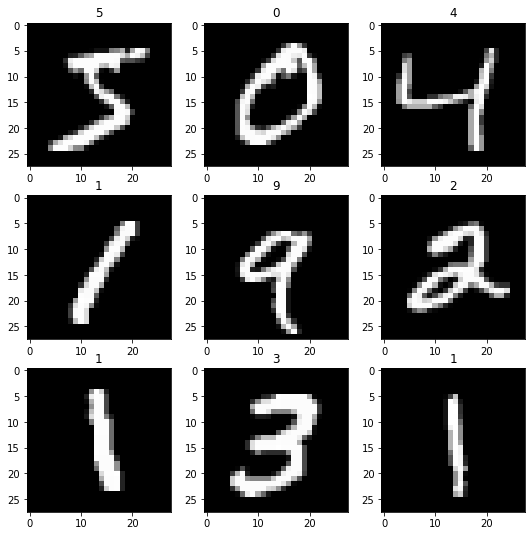

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(9,9))
for i in range(9):
    row = i//3
    column = i%3
    axs[row][column].imshow(train_x[i], cmap="gray")
    axs[row][column].set_title(train_y[i])
plt.show()

# 2. Preprocess data

In [6]:
train_x = train_x/255.0
test_x = test_x/255.0

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Split the dataset. Random_state is seed
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

In [9]:
import torch

In [10]:
class Data(torch.utils.data.Dataset):
    def __init__(self, data, label):
        self.x = data
        self.y = label

    def __len__(self):
        return self.y.shape[0]

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [11]:
train, val = Data(train_x, train_y), Data(val_x, val_y)

In [12]:
train_dataloader = torch.utils.data.DataLoader(train, batch_size=32)
val_dataloader = torch.utils.data.DataLoader(val, batch_size=32)

# 3. Build model

In [13]:
from torch import nn


class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear1 = nn.Linear(28*28, 32)
        # 10 is out_feature, corresponds to digits 0->9
        # 28 is size of dataset
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(32, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)  # Stretch array of 28*28 to 1*724
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x


# 4. Train

In [14]:
model = SimpleModel()

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

model = model.to(device)
criterion = criterion.to(device)


In [15]:
from tqdm import tqdm
min_val_loss = 100000000000
for epoch in range(10):
    total_loss_train = 0
    total_acc_train = 0
    for x, y in tqdm(train_dataloader):
        x = x.to(device)
        y = y.to(device)

        output = model(x.float())

        batch_loss = criterion(output, y)
        total_loss_train += batch_loss

        acc = (output.argmax(dim=1) == y).sum().item()
        total_acc_train += acc

        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

    total_loss_val = 0
    total_acc_val = 0
    with torch.no_grad():  # Not training
        for x, y in tqdm(val_dataloader):
            x = x.to(device)
            y = y.to(device)

            output = model(x.float())

            batch_loss = criterion(output, y)
            total_loss_val += batch_loss.item()

            acc = (output.argmax(dim=1) == y).sum().item()
            total_acc_val += acc
    print(
        f'Epochs: {epoch+1} | Train Loss: {total_loss_train / len(train):.3f}\
        | Train Accuracy: {total_acc_train/len(train):.3f}\
        | Val Loss: {total_loss_val/len(val):.3f}\
        | Val Accuracy:{total_acc_val/len(val):.3f}'
    )
    if min_val_loss > total_loss_val/len(val):
        min_val_loss = total_loss_val/len(val)
        torch.save(model.state_dict(), "simplemodel.pt")
        print(f"Save model because val loss improve loss {min_val_loss:.3f}")


100%|██████████| 188/188 [00:00<00:00, 1278.92it/s]


Epochs: 1 | Train Loss: 0.013        | Train Accuracy: 0.889        | Val Loss: 0.008        | Val Accuracy:0.927
Save model because val loss improve loss 0.008


100%|██████████| 188/188 [00:00<00:00, 1032.79it/s]


Epochs: 2 | Train Loss: 0.007        | Train Accuracy: 0.934        | Val Loss: 0.006        | Val Accuracy:0.943
Save model because val loss improve loss 0.006


100%|██████████| 188/188 [00:00<00:00, 1125.66it/s]


Epochs: 3 | Train Loss: 0.005        | Train Accuracy: 0.949        | Val Loss: 0.005        | Val Accuracy:0.951
Save model because val loss improve loss 0.005


100%|██████████| 188/188 [00:00<00:00, 984.28it/s] 


Epochs: 4 | Train Loss: 0.004        | Train Accuracy: 0.958        | Val Loss: 0.005        | Val Accuracy:0.958
Save model because val loss improve loss 0.005


100%|██████████| 188/188 [00:00<00:00, 1068.18it/s]


Epochs: 5 | Train Loss: 0.004        | Train Accuracy: 0.964        | Val Loss: 0.004        | Val Accuracy:0.961
Save model because val loss improve loss 0.004


100%|██████████| 188/188 [00:00<00:00, 1068.21it/s]


Epochs: 6 | Train Loss: 0.003        | Train Accuracy: 0.968        | Val Loss: 0.004        | Val Accuracy:0.962
Save model because val loss improve loss 0.004


100%|██████████| 188/188 [00:00<00:00, 780.19it/s]


Epochs: 7 | Train Loss: 0.003        | Train Accuracy: 0.971        | Val Loss: 0.004        | Val Accuracy:0.965
Save model because val loss improve loss 0.004


100%|██████████| 188/188 [00:00<00:00, 1056.03it/s]


Epochs: 8 | Train Loss: 0.003        | Train Accuracy: 0.973        | Val Loss: 0.004        | Val Accuracy:0.966
Save model because val loss improve loss 0.004


100%|██████████| 188/188 [00:00<00:00, 1038.52it/s]


Epochs: 9 | Train Loss: 0.003        | Train Accuracy: 0.975        | Val Loss: 0.004        | Val Accuracy:0.967
Save model because val loss improve loss 0.004


100%|██████████| 188/188 [00:00<00:00, 1062.38it/s]

Epochs: 10 | Train Loss: 0.002        | Train Accuracy: 0.977        | Val Loss: 0.004        | Val Accuracy:0.966
Save model because val loss improve loss 0.004
